まずはライブラリ系をインポート  
おまじないのように、とりあえず冒頭に書いておきます。

In [0]:
#numpyとpandasのインポート
import numpy as np
import pandas as pd

#KMeansとStandardScaler（標準化）メソッドのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

今回の主役、IrisDatasets（アヤメのデータセット）をインポートします。

In [0]:
from sklearn.datasets import load_iris

ds = load_iris()

とりあえず、どのようなデータなのかを眺めましょう。sklearnのデータセットは基本的に全て同じフォーマットになっていますので、他のデータセットを触ったことがある方は不要な手順かと思います。

In [0]:
ds

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

オブジェクト形式で格納されていて、"data","feature_names","target","target_names"にデータとカラム名が入っています。"target","target_names"は回帰や分類などの教師あり学習で利用する「ラベル」になりますので、今回は利用しません。今回は、KMeansで利用したい"data","feature_names"を扱えるように加工していきます。

In [0]:
#pandasのDataFrame形式でカラム名とデータを格納
iris_df = pd.DataFrame(ds.data,columns=ds.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


全体像をなんとなく把握するために、基本統計量を確認してみましょう。

In [0]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


KMeansを実行するため、データをnumpyのarray形式に変換しておきます。

In [0]:
iris_arr = np.array([iris_df["sepal length (cm)"].tolist(),
                    iris_df['sepal width (cm)'].tolist(),
                    iris_df['petal length (cm)'].tolist(),
                    iris_df['petal width (cm)'].tolist()])
iris_arr

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

さらに行列を転置させる事により、KMeansを実行するのに適した２次元配列の形に変換されます

In [0]:
iris_arr = iris_arr.T
iris_arr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

KMeansを実行し、結果を取得します。今回は利用しなかったラベルデータを見てみると、このデータセットは0,1,2の３つのラベルが付いていたため、クラスタ数を３として実行してみます。

In [0]:
pred = KMeans(n_clusters=3).fit_predict(iris_arr)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

DataFrame形式のデータに、予測されたクラスタ番号をくっつけます。

In [0]:
iris_df['cluster_id']=pred
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


各クラスタにいくつのレコードが割り振られたのかを確認します

In [0]:
iris_df['cluster_id'].value_counts()

1    62
0    50
2    38
Name: cluster_id, dtype: int64

In [0]:
各クラスタごとの特徴を見ていきます

In [0]:
iris_df[iris_df['cluster_id']==0].mean() 

sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
cluster_id           0.000
dtype: float64

In [0]:
iris_df[iris_df['cluster_id']==1].mean() 

sepal length (cm)    5.901613
sepal width (cm)     2.748387
petal length (cm)    4.393548
petal width (cm)     1.433871
cluster_id           1.000000
dtype: float64

In [0]:
iris_df[iris_df['cluster_id']==2].mean() 

sepal length (cm)    6.236585
sepal width (cm)     2.858537
petal length (cm)    4.807317
petal width (cm)     1.621951
cluster_id           2.000000
dtype: float64

各クラスターの情報をまとめ、グラフとして可視化するための準備を行います。

In [0]:
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(3):
    clusterinfo['cluster' + str(i)] = iris_df[iris_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

clusterinfo

,cluster0,cluster1,cluster2
sepal length (cm),5.006,5.901613,6.850000
sepal width (cm),3.428,2.748387,3.073684
petal length (cm),1.462,4.393548,5.742105
petal width (cm),0.246,1.433871,2.071053


[Text(0, 0, 'cluster0'), Text(0, 0, 'cluster1'), Text(0, 0, 'cluster2')]

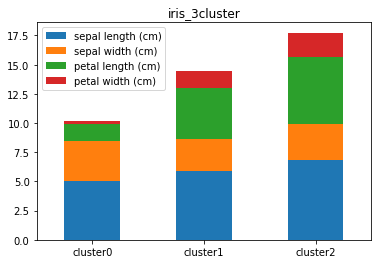

In [0]:
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="iris_3cluster")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)